<a href="https://colab.research.google.com/github/korolkovx/Focusy/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


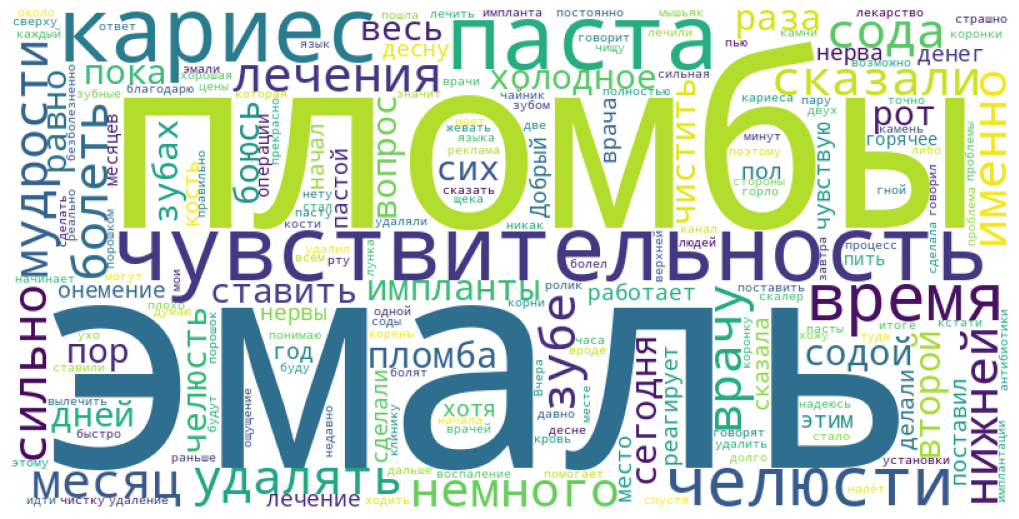

In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re

# Скачиваем необходимые ресурсы nltk (если не установлены)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def create_wordcloud_from_url(url, column_name, language='russian'):
  """
  Создает облако слов из текстовых данных в указанном столбце CSV-файла по URL,
  используя лемматизацию.

  Аргументы:
    url: URL-адрес CSV-файла.
    column_name: Имя столбца, содержащего текст для анализа.
    language: Язык текста (по умолчанию 'russian').

  Возвращает:
    None. Отображает облако слов.
  """

  # Создаем объект лемматизатора
  lemmatizer = WordNetLemmatizer()

  # Получаем список стоп-слов для выбранного языка
  stop_words = set(stopwords.words(language))

  # Дополнительные стоп-слова
  additional_stopwords = {'эт', 'так', 'вот', 'как', 'в', 'на', 'и', 'что',
                          'с', 'а', 'то', 'все', 'же', 'у', 'за', 'из', 'к',
                          'по', 'для', 'не', 'ну', 'да', 'нет', 'ты', 'я',
                          'он', 'она', 'оно', 'они', 'мы', 'вы', 'вам', 'нас',
                          'мне', 'тебе', 'ему', 'ей', 'им', 'нам', 'тебе',
                          'себе', 'меня', 'тебя', 'его', 'ее', 'их',
                          'нас', 'вас', 'мой', 'твой', 'ваш', 'наш', 'ваш',
                          'мой', 'твой', 'его', 'ее', 'их', 'отбеливания', 'ваш',
                          'этот', 'тот', 'такой', 'какой', 'который',
                          'какая', 'какие', 'это', 'просто', 'сво', 'ещ',
                          'quot', 'br','видео','вообще','всё','очень','такие','такое','таких','зубы', 'зубов', 'зуб','спасибо', 'стоматологи', 'лет','цвет', 'жизнь', 'такая',
                          'стоматолог', 'стоматологов', 'стоматологу', 'делать', 'боль', 'её',
                          'здравствуйте', 'прошло', 'пожалуйста', 'твой', 'ваш', 'отбелить', 'Катя',
                          'мой', 'твой', 'его', 'ее', 'почему', 'зубки', 'России',
                          'работы', 'стоматологии', 'такой', 'какой', 'Волос',
                          'назад', 'стоматолога', 'жизни', 'губы', 'цвета', 'природы','зубами', 'которые', 'врач', 'волос', 'одного', 'её',
                          'сказал', 'день', 'мой', 'твой', 'ваш', 'отбелить', 'стали',
                          'мой', 'удаления', 'ещё', 'удалили', 'доктор', 'нужно', 'люди',
                          'подскажите', 'пломбу', 'зуба', 'какой', 'поставили',
                          'дня', 'года', 'жизни', 'неделю', 'больно', 'болит''мой', 'твой', 'его', 'ее', 'почему', 'зубки', 'России',
                          'десны', 'десна', 'такой', 'какой', 'Волос',
                          'нерв', 'стоматолога', 'жизни', 'губы', 'месяца', 'имплант','зубами', 'которые', 'врач', 'волос', 'одного', 'её',
                          'сказал', 'день', 'мой', 'твой', 'ваш', 'отбелить', 'стали',
                          'мой', 'хочу', 'зубной', 'удалили', 'скажите', 'болит', 'деньги',
                          'несколько', 'знаю', 'недели', 'какой', 'стоит',
                          'сколько', 'могу', 'жизни', 'боли', 'нормально', 'сразу'}
  stop_words.update(additional_stopwords)

  # Читаем CSV-файл из URL в DataFrame
  df = pd.read_csv(url)

  # Объединяем все текстовые значения из указанного столбца в одну строку
  text = " ".join(str(cell) for cell in df[column_name])

  # Удаляем HTML теги
  text = re.sub('<.*?>', '', text)

  # Разбиваем текст на слова
  words = nltk.word_tokenize(text)

  # Лемматизация и удаление стоп-слов
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stop_words and word.isalnum()]

  # Объединяем слова обратно в строку
  text = " ".join(lemmatized_words)

  # Создаем облако слов с collocations=False
  wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)

  # Отображаем облако слов
  plt.figure(figsize=(10, 5), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

# URL-адрес CSV-файла
url = 'https://raw.githubusercontent.com/Polina2626/data/main/Comm.csv'
column_name = 'Comments'  # Имя столбца с текстом

create_wordcloud_from_url(url, column_name)

In [5]:
import pandas as pd
import requests
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from collections import Counter

# Загрузка необходимых ресурсов NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Инициализация стоп-слов и стеммера
stop_words = set(stopwords.words('russian'))
stemmer = SnowballStemmer("russian")

# Функция для обработки текста
def preprocess_text(text):
    # Токенизация
    tokens = nltk.word_tokenize(text, language='russian')
    # Приведение к нижнему регистру, удаление стоп-слов и стемминг
    tokens = [stemmer.stem(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return tokens

# Скачивание CSV-файла с GitHub
url = "https://raw.githubusercontent.com/Polina2626/data/main/Comm.csv"  # замените на ваш URL
response = requests.get(url)
with open('comments.csv', 'wb') as file:
    file.write(response.content)

# Загрузка комментариев из CSV
df = pd.read_csv('comments.csv')

# Просмотр названий столбцов в CSV-файле
print("Названия столбцов в CSV-файле:", df.columns)

# Предполагаем, что комментарии хранятся в столбце 'comment' - замените на правильное название столбца
comments_column = 'Comments'  # Замените это на название столбца с комментариями
if comments_column not in df.columns:
    raise ValueError(f"Столбец '{comments_column}' не найден в CSV-файле.")

comments = df[comments_column].dropna().tolist()

# Применение предобработки и подсчет частот слов
all_tokens = []
for comment in comments:
    all_tokens.extend(preprocess_text(comment))

# Подсчет частоты слов
word_freq = Counter(all_tokens)

# Преобразование в DataFrame для удобства анализа
df_word_freq = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Вывод топ-100 самых частых слов
print(df_word_freq.head(10000))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Названия столбцов в CSV-файле: Index(['VideoID', 'Comments'], dtype='object')
         word  frequency
4         зуб       1319
42         эт        615
35        бол        434
290        br        425
6        врач        292
...       ...        ...
4179  аудитор          1
4180   стиляг          1
4181    отста          1
4182    обидн          1
4351   извиня          1

[4352 rows x 2 columns]


In [12]:
df_word_freq[:100]

,word,frequency
4,зуб,1319
42,эт,615
35,бол,434
290,br,425
6,врач,292
...,...,...
513,чистк,52
1651,налет,52
339,вопрос,51
265,врем,51
